Chapter 19

# 非线性约束
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码通过约束优化方法在二维空间中寻找目标函数

$$
f(x_1, x_2) = -2x_1 e^{-x_1^2 - x_2^2}
$$

的最小值。优化包含一个非线性约束

$$
|x_1| + |x_2 + 1| \leq 1
$$

和边界条件 $x_1, x_2 \in [-1.5, 1.5]$。该非线性约束将优化变量 $(x_1, x_2)$ 限制在一个包含原点偏移的菱形区域内，从而限制搜索空间。

代码首先定义了目标函数 $f(x_1, x_2)$ 并设置了约束，然后通过 `trust-constr` 算法进行优化，最终得出满足约束条件的最小值点 $(x_{\text{opt}}, y_{\text{opt}})$。优化结果包括最小值点及其对应的目标函数值。

可视化部分展示了目标函数的等高线图和非线性约束边界。在等高线图中标记了最优解 $(x_{\text{opt}}, y_{\text{opt}})$，以帮助直观理解约束如何影响优化路径。通过这种方法，可以看到在复杂约束条件下目标函数的最优值是如何找到的。

## 导入包

In [ ]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, Bounds, NonlinearConstraint
import matplotlib.pyplot as plt  # 导入绘图库

## 目标函数：定义目标函数

In [ ]:
def obj_f(x):
    x1 = x[0]  # 提取变量 x1
    x2 = x[1]  # 提取变量 x2
    obj = -2 * x1 * np.exp(-x1**2 - x2**2)  # 计算目标函数值
    return obj

In [ ]:
x0 = [1, 1]  # 初始猜测

## 非线性约束函数：定义非线性约束

In [ ]:
def nonlinear_c(x):
    x1 = x[0]
    x2 = x[1]
    nlc = np.abs(x1) + np.abs(x2 + 1) - 1  # 计算非线性约束
    return nlc

In [ ]:
nlc = NonlinearConstraint(nonlinear_c, -np.inf, 0)  # 定义非线性约束

## 定义变量的边界

In [ ]:
bounds = Bounds([-1.5, -1.5], [1.5, 1.5])

## 最优化求解

In [ ]:
res = minimize(obj_f, x0,
               method='trust-constr',
               bounds=bounds,
               constraints=[nlc])  # 求解优化问题

optimized_x = res.x  # 提取优化后的 x 值

In [ ]:
print("==== Optimal solution ====")
print(res.x)  # 输出优化后的解

In [ ]:
print("==== Optimized objective ====")
print(res.fun)  # 输出优化后的目标函数值

## 可视化

In [ ]:
num = 201  # 定义网格数目
rr = np.linspace(-2, 2, num)  # 定义 x 取值范围
xx1, xx2 = np.meshgrid(rr, rr)  # 生成网格

yy = obj_f(np.vstack([xx1.ravel(), xx2.ravel()])).reshape((num, num))  # 计算目标函数值

==== Optimal solution ====
[ 0.49999999 -0.50000001]
==== Optimized objective ====
-0.6065306494726292


C:\Users\james\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


(-2.0, 2.0)

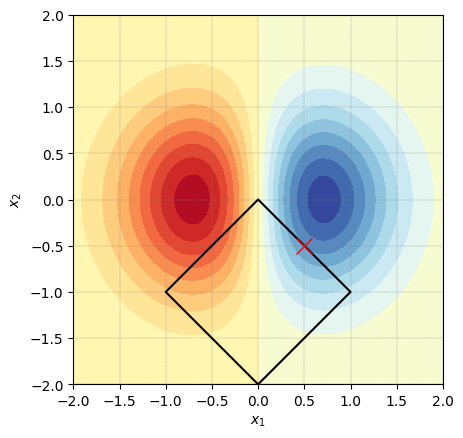

In [ ]:
fig, ax = plt.subplots()

ax.contourf(xx1, xx2, yy, levels=20, cmap="RdYlBu_r")  # 绘制目标函数的等高线图

yy_nlc = nonlinear_c(np.vstack([xx1.ravel(), xx2.ravel()])).reshape((num, num))  # 计算非线性约束
ax.contour(xx1, xx2, yy_nlc, levels=[0], colors="k")  # 绘制约束边界

plt.plot(optimized_x[0], optimized_x[1], 'rx', markersize=12)  # 标记优化解

ax.set_xlabel('$\it{x}_1$')  # 设置 x 轴标签
ax.set_ylabel('$\it{x}_2$')  # 设置 y 轴标签
ax.axis('square')
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
ax.set_xlim([rr.min(), rr.max()])
ax.set_ylim([rr.min(), rr.max()])